In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,554f5_00000,0,0.333522,least_confidence,1,1033.509021
1,1,554f5_00000,1,0.331253,least_confidence,1,1033.509021
2,2,554f5_00000,2,0.404447,least_confidence,1,1033.509021
3,3,554f5_00000,3,0.445764,least_confidence,1,1033.509021
4,4,554f5_00000,4,0.421690,least_confidence,1,1033.509021
...,...,...,...,...,...,...,...
28520,28520,554f5_00024,1136,0.930000,random,5,981.309183
28521,28521,554f5_00024,1137,0.916336,random,5,981.309183
28522,28522,554f5_00024,1138,0.935710,random,5,981.309183
28523,28523,554f5_00024,1139,0.921742,random,5,981.309183


In [3]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
22820,22820,554f5_00020,0,0.382312,random,1,1011.635463
22821,22821,554f5_00020,1,0.410478,random,1,1011.635463
22822,22822,554f5_00020,2,0.432808,random,1,1011.635463
22823,22823,554f5_00020,3,0.438518,random,1,1011.635463
22824,22824,554f5_00020,4,0.399625,random,1,1011.635463
...,...,...,...,...,...,...,...
28520,28520,554f5_00024,1136,0.930000,random,5,981.309183
28521,28521,554f5_00024,1137,0.916336,random,5,981.309183
28522,28522,554f5_00024,1138,0.935710,random,5,981.309183
28523,28523,554f5_00024,1139,0.921742,random,5,981.309183


In [4]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{row.avg:.2f} ± {row.stdv:.2f}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

/var/folders/02/fbyrwz_s7tg4vmbm1kswhxp40000gp/T/ipykernel_22772/2952143151.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])


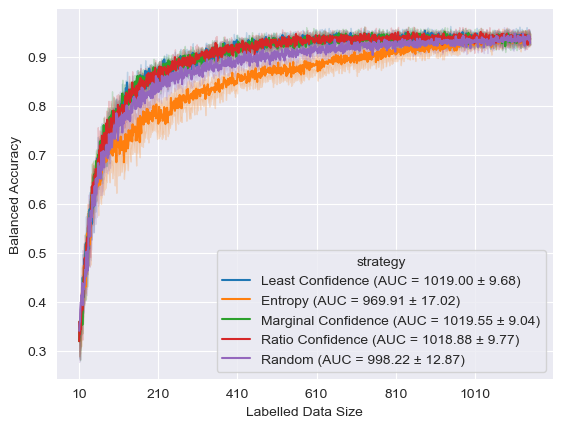

In [5]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Balanced Accuracy")
plt.xlabel("Labelled Data Size")

current_xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
    

for spine in ax.spines.values():
    spine.set_visible(False)